In [33]:
#imports
import requests
import pandas as pd
import xmltodict
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#types
from dataclasses import dataclass

@dataclass
class Autor:
    CodigoParlamentar: str
    FormaTratamento: str
    NomeParlamentar: str
    UfParlamentar: str
    UrlPaginaParlamentar: str
    UrlFotoParlamentar: str
    QuantidadeMaterias: str

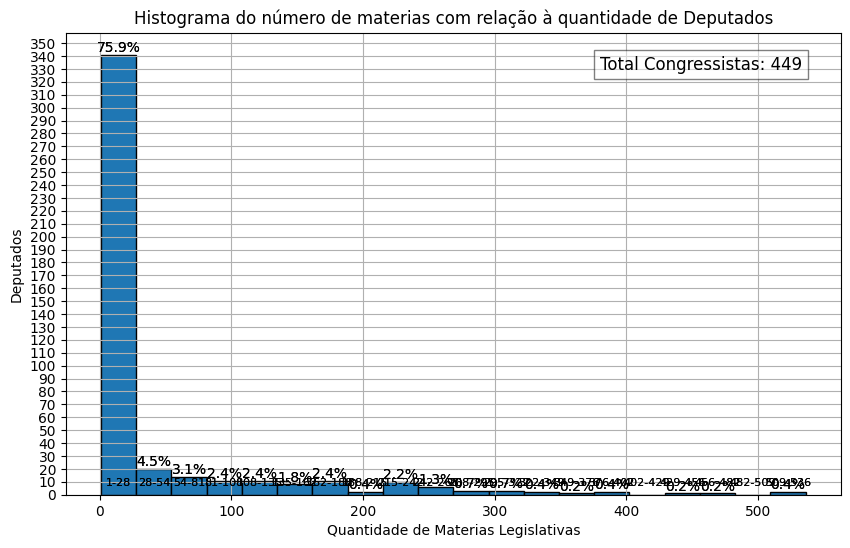

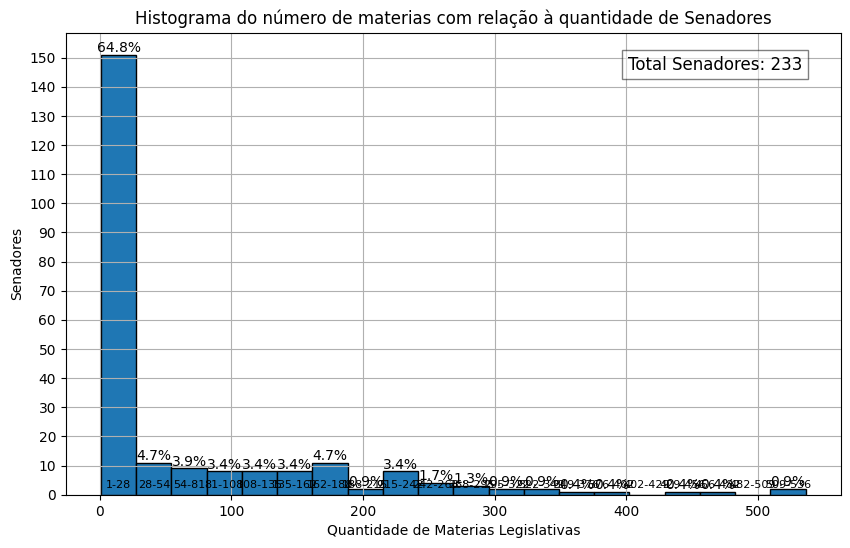

In [ ]:
#por que eu escolhi a api do senado federal? 
#porque ela é uma api publica e eu não preciso de uma chave de acesso para consumir os dados, além disso, ela é bem documentada e fácil de entender e por ser relacionado a política, é interessante para nós como cidadãos analisar o que se passa no senado.

#dados sobre autores de autores de materias
# url_autores = "https://legis.senado.leg.br/dadosabertos/autor/lista/atual"
# response_autores = requests.get(url_autores)

# #dados sobre autores de materias 
# content = response_autores.content.decode('ISO-8859-1')
# dict_content = xmltodict.parse(content)
# autores = dict_content['ListaAutores']['Autores']['Autor']
# # Convert the 'QuantidadeMaterias' column to numeric
# df_autores = pd.DataFrame(autores, columns=['CodigoParlamentar', 'FormaTratamento', 'NomeParlamentar', 'QuantidadeMaterias'])
# df_autores['QuantidadeMaterias'] = pd.to_numeric(df_autores['QuantidadeMaterias'], errors='coerce')

df_autores = pd.read_csv('autores.csv')
df_autores_deputados = df_autores[df_autores['FormaTratamento'] == 'Deputado']
df_autores_senadores = df_autores[df_autores['FormaTratamento'] == 'Senador']

#plotando um gráfico de barras para mostrar a quantidade de matérias por congressista
counts, bins = np.histogram(df_autores['QuantidadeMaterias'], bins=20)
percentages = counts / counts.sum() * 100
plt.figure(figsize=(10, 6))
plt.text(0.95, 0.95, f'Total Congressistas: {len(df_autores)}', 
         horizontalalignment='right', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.yticks(range(0, 500, 10))
hist = df_autores['QuantidadeMaterias'].plot(kind='hist', bins=20, edgecolor='black')
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, 30, f'{bins[i]:.0f}-{bins[i + 1]:.0f}', ha='center', va='bottom', fontsize=8)
    if percentages[i] > 0:
        plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, counts[i], f'{percentages[i]:.1f}%', ha='center', va='bottom')
plt.title('Histograma do número de materias com relação à quantidade de Congressistas')
plt.xlabel('Quantidade de Materias Legislativas')
plt.ylabel('Congressistas')
plt.grid(True)
# Show the range of each bin
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, 30, f'{bins[i]:.0f}-{bins[i + 1]:.0f}', ha='center', va='bottom', fontsize=8)
    if percentages[i] > 0:
        plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, counts[i], f'{percentages[i]:.1f}%', ha='center', va='bottom')
plt.title('Histograma do número de materias com relação à quantidade de Deputados')
plt.xlabel('Quantidade de Materias Legislativas')
plt.ylabel('Deputados')
plt.grid(True)
plt.show()


counts, bins = np.histogram(df_autores_senadores['QuantidadeMaterias'], bins=20)
percentages = counts / counts.sum() * 100
plt.figure(figsize=(10, 6))
plt.text(0.95, 0.95, f'Total Senadores: {len(df_autores_senadores)}', 
         horizontalalignment='right', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.yticks(range(0, 500, 10))
hist = df_autores_senadores['QuantidadeMaterias'].plot(kind='hist', bins=20, edgecolor='black')
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, 30, f'{bins[i]:.0f}-{bins[i + 1]:.0f}', ha='center', va='top', fontsize=8)
    if percentages[i] > 0:
        plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, counts[i], f'{percentages[i]:.1f}%', ha='center', va='bottom')
plt.title('Histograma do número de materias com relação à quantidade de Senadores')
plt.xlabel('Quantidade de Materias Legislativas')
plt.ylabel('Senadores')
plt.grid(True)
plt.show()





In [ ]:
#dados sobre os congressistas
#afastados
url_afastados = "https://legis.senado.leg.br/dadosabertos/senador/lista/afastados"
url_
response_afastados = requests.get(url_afastados)